### Пройдя весь путь интерполирования данных заново, я пришёл к выводу, что вклад способа интерполяции в ошибку минимален, поэтому, я решил продолжить работы над регуляризацией и начать с метода MLR

Y = XB+ E

B = (XT X)−1XTY 

Реализую класс с регуляризацией и без и посмотрю, что лучше. Глядишь, и придумаю, как запихнуть регуляризацию в наши скрипты

In [103]:
import numpy as np
from gzip import open # NB: overrides standard open()
import pickle as pkl
import pandas as pd
import warnings 
from glob import glob
import os
import math
import functools
import matplotlib.pyplot as plt

In [104]:
from numpy import linalg as LA

In [105]:
warnings.simplefilter('ignore')

In [114]:
class MLR_with_regularisation(RegressorMixin,BaseEstimator):
    def  __init__(self,a=0.3):
        self.a=a
    
    def fit(self, X,y):
        B=np.dot(np.dot(LA.inv((np.dot(np.transpose(X),X))+(self.a*np.eye(X.shape[1]))),np.transpose(X)),y)
        self.B=B
        return self
    
    def predict(self,X):
        y=np.dot(np.reshape(self.B, (1,X.shape[1])),np.transpose(X))
        self.y=y
        return y

In [115]:
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/PLS2021/N-PLS/X_new.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/PLS2021/N-PLS/y.pkl.gz', 'rb'))

In [116]:
#разворачиваем тензор
Xdata_numpy['X'].shape = (Xdata_numpy['X'].shape[0], Xdata_numpy['X'].shape[1] * Xdata_numpy['X'].shape[2])
Xdata_numpy['X'][:,np.isnan(Xdata_numpy['X']).any(axis = 0)] = 0 # zero out any columns containing NaN

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
#делим набор на обучающий и тестовый
X_train, X_test, y_train, y_test = train_test_split(
     Xdata_numpy['X'], Ydata.iloc[:,0], test_size=0.35
)
print(X_train.shape)
print(y_train.shape)

(22, 10712)
(22,)


In [119]:
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.base import RegressorMixin
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [120]:
model=MLR_without_regularisation()

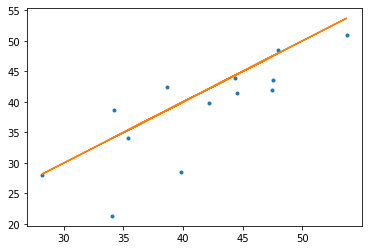

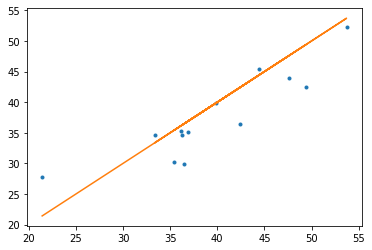

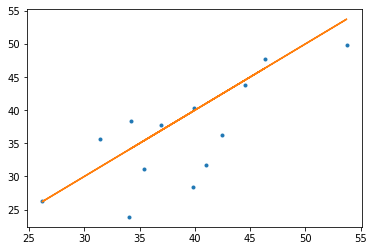

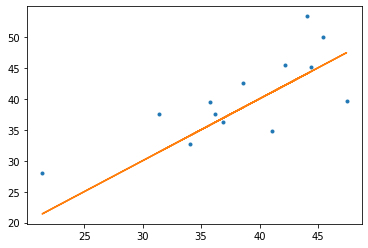

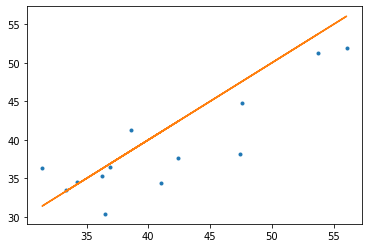

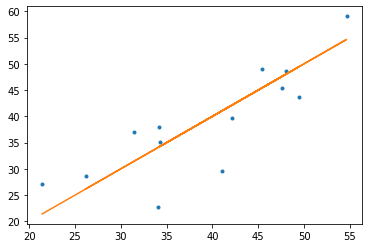

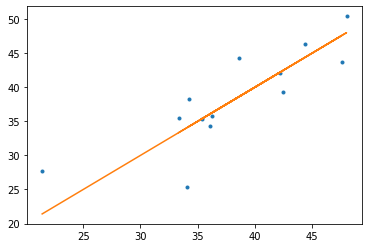

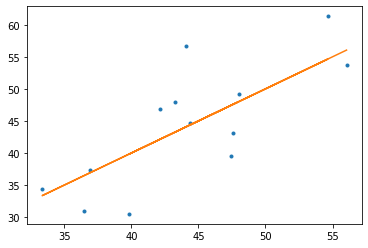

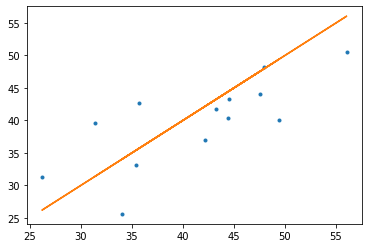

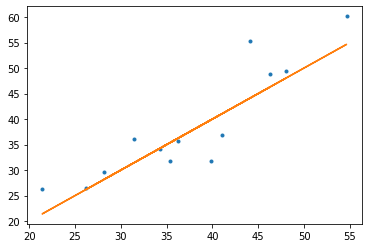

Wall time: 16min 28s


In [129]:
%%time
r2=list()
for i in range(1,11,1):
    X_train, X_test, y_train, y_test = train_test_split(
     Xdata_numpy['X'], Ydata.iloc[:,0], test_size=0.35
    )
    model=MLR_without_regularisation(a=i*0.1)
    model.fit(X_train.copy(),y_train.copy())
    y_pr=model.predict(X_test.copy())
    r2.append(r2_score(y_test,np.reshape(y_pr,(y_test.shape[0]))))
    plt.plot(y_test,np.reshape(y_pr,(y_test.shape[0])),".")
    plt.plot(y_test,y_test)
    plt.show()

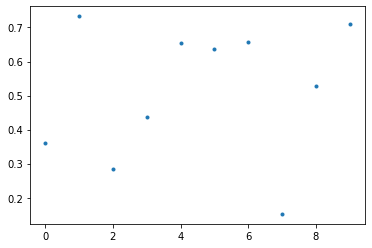

In [130]:
plt.plot(r2,".")
plt.show()

In [131]:
max(r2)

0.733020274696856

In [122]:
import matplotlib.pyplot as plt

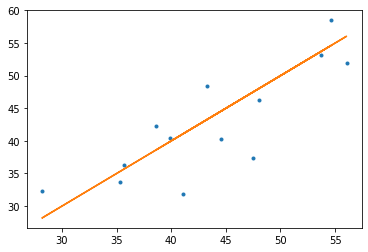

In [125]:
plt.plot(y_test,np.reshape(y_pr,(y_test.shape[0])),".")
plt.plot(y_test,y_test)
plt.show()

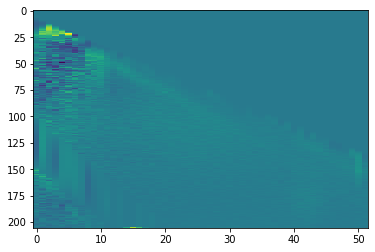

In [126]:
plt.imshow(np.reshape(model.B,(X_train.shape[1]//52,52)), aspect='auto')
plt.show()

In [128]:
r2_score(y_test,np.reshape(y_pr,(y_test.shape[0])))

0.6396800454994026